# Importing required modules

In [216]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [217]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [218]:
# read in an edge list from the file 'test.txt'
G = nx.read_edgelist('./edges.txt', comments='#',
                     create_using=nx.MultiDiGraph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')
nx.info(G)

'MultiDiGraph with 435 nodes and 1528 edges'

## **Before Randomization**

In [219]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

In [220]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

# print()
# print("the adjacency list")
# for line in nx.generate_adjlist(G):
#     print(line)

Number of nodes:  435
Number of edges:  1528

Average degree:  7.025287356321839
Average degree (alternate calculation) 7.025287356321839

Minimum degree:  1
Maximum degree:  32


Degree Distribution - Before Randomization

In [221]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

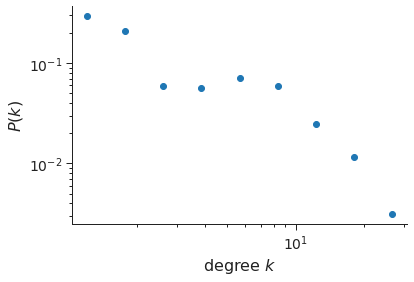

In [222]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

Network - Before Randomization

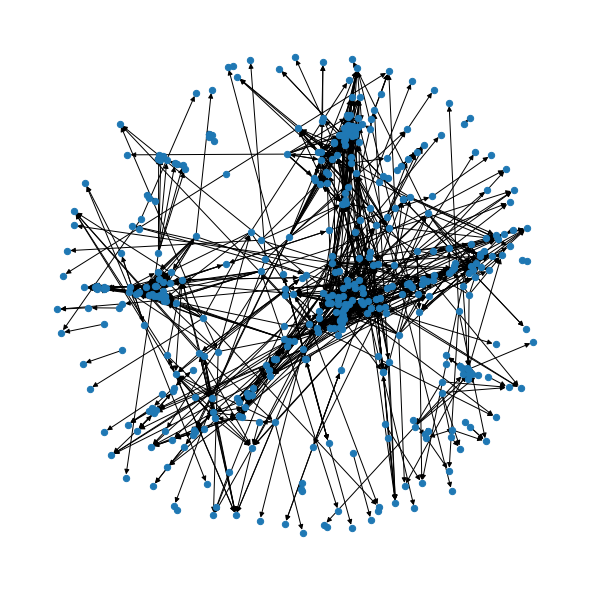

In [223]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G, node_size=40)

## **After Randomization**

Create a Random Network using a Configuration Model

In [224]:
inDeg = list(g for N, g in G.in_degree())
outDeg = list(g for N, g in G.out_degree())
R_G = nx.directed_configuration_model(inDeg, outDeg)

R_N = len(G)
R_L = G.size()
R_degrees = [G.degree(node) for node in G]
R_kmin = min(degrees)
R_kmax = max(degrees)
# print()
# print("the adjacency list")
# for line in nx.generate_adjlist(G):
#     print(line)

Create an ensemble of 1000 Random Networks

In [248]:
NUM_RANDOM_NETWORKS = 3
clusteringCount = 0
pathLengthCount = 0
pathStd = 0

for _ in range(NUM_RANDOM_NETWORKS):
  # Remove parallel edges from R_G
  R_G2 = nx.Graph(R_G)

  # Average clustering coeffcient of the current network
  cc = nx.average_clustering(R_G2)
  clusteringCount += cc

  # Average shortest path length of the current network
  sp = nx.average_shortest_path_length(R_G2)
  sp2 = dict(nx.all_pairs_shortest_path_length(R_G2))
  df = pd.DataFrame(sp2)
  # print("length.values", sp2)
  # print(df)
  spStd = np.std(df)
  # print(np.std(df))
  pathLengthCount += sp
  pathStd += spStd
  print(spStd)

# Print Statements
clusteringAverage = clusteringCount/NUM_RANDOM_NETWORKS
print("Average Clustering Coefficient", clusteringAverage)
pathLengthAverage = pathLengthCount/NUM_RANDOM_NETWORKS
print("Average Path Length ", pathLengthAverage)
print("Average Path Length Standard Deviation ")
# Print 


0      0.795336
1      0.775555
2      0.800139
3      0.777250
4      0.738700
         ...   
430    0.767224
431    0.826308
432    0.777657
433    0.797327
434    0.803263
Length: 435, dtype: float64
0      0.795336
1      0.775555
2      0.800139
3      0.777250
4      0.738700
         ...   
430    0.767224
431    0.826308
432    0.777657
433    0.797327
434    0.803263
Length: 435, dtype: float64
0      0.795336
1      0.775555
2      0.800139
3      0.777250
4      0.738700
         ...   
430    0.767224
431    0.826308
432    0.777657
433    0.797327
434    0.803263
Length: 435, dtype: float64
Average Clustering Coefficient 0.030171278451649297
Average Path Length  3.336490280205519
Average Path Length Standard Deviation 


Degree Distribution - After Randomization

In [226]:
# Get 10 logarithmically spaced bins between kmin and kmax
R_bin_edges = np.logspace(np.log10(R_kmin), np.log10(R_kmax), num=10)

# histogram the data into these bins
R_density, _ = np.histogram(R_degrees, bins=bin_edges, density=True)

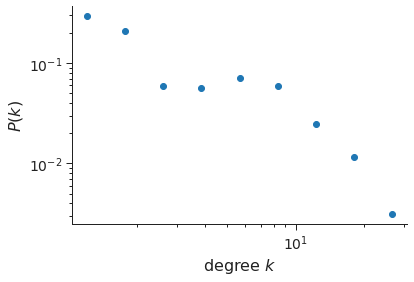

In [227]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(R_bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, R_density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

Network - After Randomization

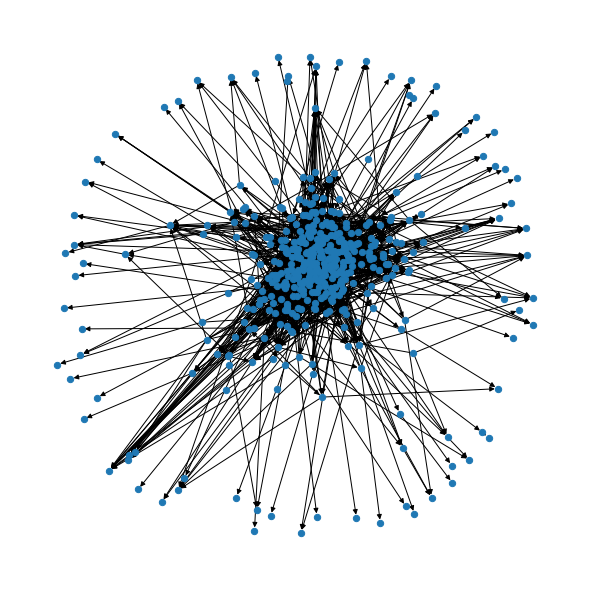

In [228]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
R_G.remove_edges_from(nx.selfloop_edges(R_G))
nx.draw_spring(R_G, node_size=40)